# Build Model on new DataSet

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## I. Cleaning and Preprocessing Data

In [3]:
df_songs = pd.read_csv('subset_every_feature.csv')
print(df_songs.shape)
df_songs.head()

(1592, 93)


Unnamed: 0  Unnamed: 0.1  Position         Track Name         Artist  \
0           0         27320       103   Me Gusta - Remix      Alkilados   
1           1          9386        37       Side To Side  Ariana Grande   
2           2         66912        64       Bleed It Out    Linkin Park   
3           3         25974         1  Despacito - Remix     Luis Fonsi   
4           4          2535       153         Dubai Shit    Huncho Jack   

   Streams                                                URL        Date  \
0     1531  https://open.spotify.com/track/7pueb0FHOYlKAJP...  2017-03-30   
1     1184  https://open.spotify.com/track/4pLwZjInHj3SimI...  2017-01-02   
2  1256213  https://open.spotify.com/track/3qmvK8QARSPkFTu...  2017-07-21   
3   504922  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-05-26   
4    30015  https://open.spotify.com/track/5TRaIECBIfSkeqk...  2017-12-22   

   Region  acousticness                        ...                          \
0      gt        0.0671                        ...                           
1      lt        0.0408                        ...                           
2  global        0.0747                        ...                           
3      br        0.2290                        ...                           
4      fr        0.0569                        ...                           

                                        timbre_all_3  \
0  [9.469, -154.046, -145.614, -107.148, -89.892,...   
1  [9.469, 112.323, 9.7, 65.887, 41.122, 85.356, ...   
2  [9.469, 63.151, 48.759, 31.726, 60.184, 62.982...   
3  [97.607, 61.397, 44.145, 107.329, 99.803, 7.17...   
4  [47.989, -5.792, 33.818, 56.002, 82.42, 83.832...   

                                        timbre_all_4  \
0  [-28.48, -63.445, -84.944, -133.198, -69.415, ...   
1  [-28.48, -106.592, 74.184, 57.284, -187.479, -...   
2  [-28.48, -88.716, 0.539, 34.455, -22.788, 9.36...   
3  [-310.517, 59.632, 90.762, 50.261, 54.535, 145...   
4  [-56.878, -16.571, -28.488, -11.643, -16.119, ...   

                                        timbre_all_5  \
0  [57.491, 6.579, 15.005, -19.511, -25.059, -18....   
1  [57.491, 32.225, 19.191, 117.453, 49.711, 85.6...   
2  [57.491, 52.622, 50.193, 20.511, 28.765, 36.98...   
3  [87.878, 47.105, 78.731, 145.399, 129.718, 106...   
4  [135.306, 87.387, 88.055, 104.627, 100.962, 10...   

                                        timbre_all_6  \
0  [-50.067, -73.619, -60.84, -47.25, -49.875, -4...   
1  [-50.067, 59.13, 41.981, 134.899, -17.262, -12...   
2  [-50.067, 92.913, -0.076, -37.353, -11.487, -3...   
3  [227.047, -39.664, -65.7, -21.95, -18.758, -9....   
4  [-23.107, -51.62, -37.607, -34.948, -42.218, -...   

                                        timbre_all_7  \
0  [14.833, 15.024, 24.499, -6.516, -8.199, -0.71...   
1  [14.833, -14.27, -23.128, 7.356, -26.231, -40....   
2  [14.833, 9.734, 6.371, 1.575, 24.376, 29.255, ...   
3  [68.419, 39.715, 26.9, -7.679, -24.475, -41.45...   
4  [50.826, 16.039, 26.418, 5.967, 20.658, 9.299,...   

                                        timbre_all_8  \
0  [5.359, 4.801, 18.949, 21.249, -0.277, -0.328,...   
1  [5.359, -5.607, -56.754, -3.356, 47.938, -19.8...   
2  [5.359, 9.137, -7.323, 27.296, -0.841, 43.187,...   
3  [10.427, 10.712, 66.095, -13.804, -8.591, 43.1...   
4  [-10.056, 19.528, 15.119, -1.994, 2.54, 17.328...   

                                        timbre_all_9  \
0  [-27.228, -7.805, -8.304, 40.258, 33.085, 33.6...   
1  [-27.228, -10.957, -15.955, 30.643, -7.379, -0...   
2  [-27.228, 10.681, 3.93, 15.943, 13.14, 5.89, -...   
3  [-29.121, -18.868, -0.496, -8.432, 0.868, -4.9...   
4  [-10.385, 8.696, 12.326, 11.872, 13.119, 16.88...   

                                       timbre_all_10  \
0  [0.973, 2.661, -1.462, 14.984, 18.834, 23.424,...   
1  [0.973, 22.207, 15.478, 23.2, -2.171, -21.529,...   
2  [0.973, -27.245, 10.954, 2.236, -1.93, -2.151,...   
3  [55.849, -11.17, -22.492, 15.199, 

In [4]:
df_songs.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Position', 'Track Name', 'Artist',
       'Streams', 'URL', 'Date', 'Region', 'acousticness', 'analysis_url',
       'danceability', 'duration_ms', 'energy', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri', 'valence', 'ee', 'br',
       'my', 'cz', 'pe', 'gb', 'ie', 'se', 'sk', 'co', 'sg', 'ec', 'es', 'no',
       'dk', 'be', 'lu', 'do', 'nz', 'de', 'hu', 'cr', 'jp', 'hk', 'lt', 'pl',
       'it', 'hn', 'mx', 'ph', 'cl', 'is', 'ca', 'ar', 'at', 'ch', 'tr', 'py',
       'tw', 'gt', 'sv', 'us', 'fr', 'global', 'nl', 'bo', 'lv', 'gr', 'pa',
       'uy', 'au', 'pt', 'fi', 'genre', 'timbre_all_1', 'timbre_all_2',
       'timbre_all_3', 'timbre_all_4', 'timbre_all_5', 'timbre_all_6',
       'timbre_all_7', 'timbre_all_8', 'timbre_all_9', 'timbre_all_10',
       'timbre_all_11', 'timbre_all_12'],
      dtype='object')

In [5]:
local_output = ['ee', 'br',
       'my', 'cz', 'pe', 'gb', 'ie', 'se', 'sk', 'co', 'sg', 'ec', 'es', 'no',
       'dk', 'be', 'lu', 'do', 'nz', 'de', 'hu', 'cr', 'jp', 'hk', 'lt', 'pl',
       'it', 'hn', 'mx', 'ph', 'cl', 'is', 'ca', 'ar', 'at', 'ch', 'tr', 'py',
       'tw', 'gt', 'sv', 'us', 'fr', 'global', 'nl', 'bo', 'lv', 'gr', 'pa',
       'uy', 'au', 'pt', 'fi']
df_output = df_songs[local_output]
print('We have outputs in {} countries!'.format(len(local_output)))

We have outputs in 53 countries!


In [6]:
spotify_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo','valence']

TODO: Check correlance between spotify features and popularity

In [7]:
# Create list of URI's for Ricky to scrape features
df_uri = df_songs['uri']
df_uri.head()
df_uri.to_csv('uri.csv')

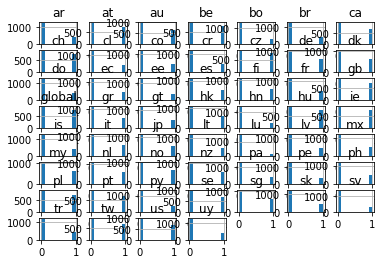

In [8]:
plt.figure()
df_output.hist()
plt.show()

In [9]:
for i in range(df_output.shape[1]):
    print('Country: ' + local_output[i]);
    print(df_output.iloc[:,i].value_counts())

Country: ee
False    1218
True      374
Name: ee, dtype: int64
Country: br
False    1191
True      401
Name: br, dtype: int64
Country: my
False    987
True     605
Name: my, dtype: int64
Country: cz
False    838
True     754
Name: cz, dtype: int64
Country: pe
False    1226
True      366
Name: pe, dtype: int64
Country: gb
False    865
True     727
Name: gb, dtype: int64
Country: ie
False    849
True     743
Name: ie, dtype: int64
Country: se
False    933
True     659
Name: se, dtype: int64
Country: sk
False    1144
True      448
Name: sk, dtype: int64
Country: co
False    1138
True      454
Name: co, dtype: int64
Country: sg
False    989
True     603
Name: sg, dtype: int64
Country: ec
False    1159
True      433
Name: ec, dtype: int64
Country: es
False    1065
True      527
Name: es, dtype: int64
Country: no
False    956
True     636
Name: no, dtype: int64
Country: dk
False    991
True     601
Name: dk, dtype: int64
Country: be
False    859
True     733
Name: be, dtype: int64
Country: l

### Clean Timbre 

In [10]:
timbre_features = ['timbre_all_1', 'timbre_all_2',
       'timbre_all_3', 'timbre_all_4', 'timbre_all_5', 'timbre_all_6',
       'timbre_all_7', 'timbre_all_8', 'timbre_all_9', 'timbre_all_10',
       'timbre_all_11', 'timbre_all_12']
df_timbre = df_songs[timbre_features]
df_timbre.head()

timbre_all_1  \
0  [0.0, 24.1, 23.897, 27.356, 32.848, 33.768, 36...   
1  [0.0, 20.612, 29.468, 37.065, 42.457, 50.682, ...   
2  [0.0, 31.777, 39.716, 39.18, 35.536, 35.466, 3...   
3  [29.786, 44.835, 43.066, 30.901, 26.588, 17.29...   
4  [16.954, 21.548, 23.284, 25.593, 27.256, 28.65...   

                                        timbre_all_2  \
0  [171.13, -232.911, -237.644, -157.177, -88.399...   
1  [171.13, 281.408, 154.885, 7.066, -17.206, 134...   
2  [171.13, 39.599, 2.798, -27.888, -6.495, 24.74...   
3  [123.603, 145.221, 165.632, 155.171, 55.16, 54...   
4  [-106.498, -157.065, -152.822, -170.706, -169....   

                                        timbre_all_3  \
0  [9.469, -154.046, -145.614, -107.148, -89.892,...   
1  [9.469, 112.323, 9.7, 65.887, 41.122, 85.356, ...   
2  [9.469, 63.151, 48.759, 31.726, 60.184, 62.982...   
3  [97.607, 61.397, 44.145, 107.329, 99.803, 7.17...   
4  [47.989, -5.792, 33.818, 56.002, 82.42, 83.832...   

                                        timbre_all_4  \
0  [-28.48, -63.445, -84.944, -133.198, -69.415, ...   
1  [-28.48, -106.592, 74.184, 57.284, -187.479, -...   
2  [-28.48, -88.716, 0.539, 34.455, -22.788, 9.36...   
3  [-310.517, 59.632, 90.762, 50.261, 54.535, 145...   
4  [-56.878, -16.571, -28.488, -11.643, -16.119, ...   

                                        timbre_all_5  \
0  [57.491, 6.579, 15.005, -19.511, -25.059, -18....   
1  [57.491, 32.225, 19.191, 117.453, 49.711, 85.6...   
2  [57.491, 52.622, 50.193, 20.511, 28.765, 36.98...   
3  [87.878, 47.105, 78.731, 145.399, 129.718, 106...   
4  [135.306, 87.387, 88.055, 104.627, 100.962, 10...   

                                        timbre_all_6  \
0  [-50.067, -73.619, -60.84, -47.25, -49.875, -4...   
1  [-50.067, 59.13, 41.981, 134.899, -17.262, -12...   
2  [-50.067, 92.913, -0.076, -37.353, -11.487, -3...   
3  [227.047, -39.664, -65.7, -21.95, -18.758, -9....   
4  [-23.107, -51.62, -37.607, -34.948, -42.218, -...   

                                        timbre_all_7  \
0  [14.833, 15.024, 24.499, -6.516, -8.199, -0.71...   
1  [14.833, -14.27, -23.128, 7.356, -26.231, -40....   
2  [14.833, 9.734, 6.371, 1.575, 24.376, 29.255, ...   
3  [68.419, 39.715, 26.9, -7.679, -24.475, -41.45...   
4  [50.826, 16.039, 26.418, 5.967, 20.658, 9.299,...   

                                        timbre_all_8  \
0  [5.359, 4.801, 18.949, 21.249, -0.277, -0.328,...   
1  [5.359, -5.607, -56.754, -3.356, 47.938, -19.8...   
2  [5.359, 9.137, -7.323, 27.296, -0.841, 43.187,...   
3  [10.427, 10.712, 66.095, -13.804, -8.591, 43.1...   
4  [-10.056, 19.528, 15.119, -1.994, 2.54, 17.328...   

                                        timbre_all_9  \
0  [-27.228, -7.805, -8.304, 40.258, 33.085, 33.6...   
1  [-27.228, -10.957, -15.955, 30.643, -7.379, -0...   
2  [-27.228, 10.681, 3.93, 15.943, 13.14, 5.89, -...   
3  [-29.121, -18.868, -0.496, -8.432, 0.868, -4.9...   
4  [-10.385, 8.696, 12.326, 11.872, 13.119, 16.88...   

                                       timbre_all_10  \
0  [0.973, 2.661, -1.462, 14.984, 18.834, 23.424,...   
1  [0.973, 22.207, 15.478, 23.2, -2.171, -21.529,...   
2  [0.973, -27.245, 10.954, 2.236, -1.93, -2.151,...   
3  [55.849, -11.17, -22.492, 15.199, 15.004, -21....   
4  [33.954, 6.811, 20.58, 11.461, 7.841, 24.766, ...   

                                       timbre_all_11  \
0  [-10.64, -9.55, -0.761, 12.993, -7.358, -8.305...   
1  [-10.64, 41.326, -93.342, 11.952, 41.559, 5.65...   
2  [-10.64, -9.127, -21.592, 2.371, -23.49, -20.9...   
3  [-15.943, -6.505, -14.11, -18.788, -11.257, -4...   
4  [8.548, -11.543, 5.437, -6.115, -7.659, -2.381...   

                                       timbre_all_12  
0  [-7.228, -17.296, -22.295, -10.881, -15.234, -...  
1  [-7.228, -12.727, 15.358, -21.875, -2.807, 4.9...  
2  [-7.228, 10.088, 11.139, -6.284, 5.677, 3.988,...  
3  [7.366, 54.847, 39.465, 44.759, 42.342, 22.446...  
4  [-45.017, -24.615, -27.227, -23.219, -28.364, ...

In [11]:
# Check type of array:
type(df_timbre.iloc[0,0])

str

In [12]:
# Function for converting TimbreString into List
def timbreStringToList(timbreString):
    timbreString = timbreString[:-1]
    timbreString = timbreString[1:]
    timbreList = [float(s) for s in timbreString.split(',')]
    return timbreList

In [13]:
# Convert strings to lists
for i in range(df_timbre.shape[1]):
    timbre_df = df_timbre.iloc[:,i]
    for j in range(timbre_df.shape[0]):
        timbre_df[j] = timbreStringToList(timbre_df[j])
    df_timbre.iloc[:,i] = timbre_df

In [14]:
# Test if it's a list
type(df_timbre.iloc[2,1])

list

In [15]:
df_timbre.shape

(1592, 12)

In [16]:
from scipy.stats import kurtosis
from scipy.stats import skew
def f_mean(row):
    return(np.mean(row))
def f_median(row):
    return(np.median(row))
def f_std(row):
     return(np.std(row))
def f_min(row):
     return(np.min(row))
def f_max(row):
     return(np.max(row))
def f_80Percentile(row):
    return(np.percentile(row, 80))
def f_kurtosis(row):
    return(kurtosis(row))
def f_skew(row):
    return(skew(row))

In [17]:
# Create timbre features
for i in range(df_timbre.shape[1]):
    current_column  = df_timbre.iloc[:,i]
    df_timbre['mean_timbre{}'.format(i+1)] = current_column.apply(f_mean)
    df_timbre['median_timbre{}'.format(i+1)] = current_column.apply(f_median)
    df_timbre['std_timbre{}'.format(i+1)] = current_column.apply(f_std)
    df_timbre['min_timbre{}'.format(i+1)] = current_column.apply(f_min)
    df_timbre['max_timbre{}'.format(i+1)] = current_column.apply(f_max)
    df_timbre['range_timbre{}'.format(i+1)] = df_timbre['max_timbre{}'.format(i+1)]-df_timbre['min_timbre{}'.format(i+1)]
    df_timbre['80Percentile_timbre{}'.format(i+1)] = current_column.apply(f_80Percentile)
    df_timbre['kurtosis_timbre{}'.format(i+1)] = current_column.apply(f_kurtosis)
    df_timbre['skewness_timbre{}'.format(i+1)] = current_column.apply(f_skew)

    print('Finished Column {}'.format(i))

Finished Column 0
Finished Column 1
Finished Column 2
Finished Column 3
Finished Column 4
Finished Column 5
Finished Column 6
Finished Column 7
Finished Column 8
Finished Column 9
Finished Column 10
Finished Column 11


In [18]:
df_timbre.head()

timbre_all_1  \
0  [0.0, 24.1, 23.897, 27.356, 32.848, 33.768, 36...   
1  [0.0, 20.612, 29.468, 37.065, 42.457, 50.682, ...   
2  [0.0, 31.777, 39.716, 39.18, 35.536, 35.466, 3...   
3  [29.786, 44.835, 43.066, 30.901, 26.588, 17.29...   
4  [16.954, 21.548, 23.284, 25.593, 27.256, 28.65...   

                                        timbre_all_2  \
0  [171.13, -232.911, -237.644, -157.177, -88.399...   
1  [171.13, 281.408, 154.885, 7.066, -17.206, 134...   
2  [171.13, 39.599, 2.798, -27.888, -6.495, 24.74...   
3  [123.603, 145.221, 165.632, 155.171, 55.16, 54...   
4  [-106.498, -157.065, -152.822, -170.706, -169....   

                                        timbre_all_3  \
0  [9.469, -154.046, -145.614, -107.148, -89.892,...   
1  [9.469, 112.323, 9.7, 65.887, 41.122, 85.356, ...   
2  [9.469, 63.151, 48.759, 31.726, 60.184, 62.982...   
3  [97.607, 61.397, 44.145, 107.329, 99.803, 7.17...   
4  [47.989, -5.792, 33.818, 56.002, 82.42, 83.832...   

                                        timbre_all_4  \
0  [-28.48, -63.445, -84.944, -133.198, -69.415, ...   
1  [-28.48, -106.592, 74.184, 57.284, -187.479, -...   
2  [-28.48, -88.716, 0.539, 34.455, -22.788, 9.36...   
3  [-310.517, 59.632, 90.762, 50.261, 54.535, 145...   
4  [-56.878, -16.571, -28.488, -11.643, -16.119, ...   

                                        timbre_all_5  \
0  [57.491, 6.579, 15.005, -19.511, -25.059, -18....   
1  [57.491, 32.225, 19.191, 117.453, 49.711, 85.6...   
2  [57.491, 52.622, 50.193, 20.511, 28.765, 36.98...   
3  [87.878, 47.105, 78.731, 145.399, 129.718, 106...   
4  [135.306, 87.387, 88.055, 104.627, 100.962, 10...   

                                        timbre_all_6  \
0  [-50.067, -73.619, -60.84, -47.25, -49.875, -4...   
1  [-50.067, 59.13, 41.981, 134.899, -17.262, -12...   
2  [-50.067, 92.913, -0.076, -37.353, -11.487, -3...   
3  [227.047, -39.664, -65.7, -21.95, -18.758, -9....   
4  [-23.107, -51.62, -37.607, -34.948, -42.218, -...   

                                        timbre_all_7  \
0  [14.833, 15.024, 24.499, -6.516, -8.199, -0.71...   
1  [14.833, -14.27, -23.128, 7.356, -26.231, -40....   
2  [14.833, 9.734, 6.371, 1.575, 24.376, 29.255, ...   
3  [68.419, 39.715, 26.9, -7.679, -24.475, -41.45...   
4  [50.826, 16.039, 26.418, 5.967, 20.658, 9.299,...   

                                        timbre_all_8  \
0  [5.359, 4.801, 18.949, 21.249, -0.277, -0.328,...   
1  [5.359, -5.607, -56.754, -3.356, 47.938, -19.8...   
2  [5.359, 9.137, -7.323, 27.296, -0.841, 43.187,...   
3  [10.427, 10.712, 66.095, -13.804, -8.591, 43.1...   
4  [-10.056, 19.528, 15.119, -1.994, 2.54, 17.328...   

                                        timbre_all_9  \
0  [-27.228, -7.805, -8.304, 40.258, 33.085, 33.6...   
1  [-27.228, -10.957, -15.955, 30.643, -7.379, -0...   
2  [-27.228, 10.681, 3.93, 15.943, 13.14, 5.89, -...   
3  [-29.121, -18.868, -0.496, -8.432, 0.868, -4.9...   
4  [-10.385, 8.696, 12.326, 11.872, 13.119, 16.88...   

                                       timbre_all_10        ...          \
0  [0.973, 2.661, -1.462, 14.984, 18.834, 23.424,...        ...           
1  [0.973, 22.207, 15.478, 23.2, -2.171, -21.529,...        ...           
2  [0.973, -27.245, 10.954, 2.236, -1.93, -2.151,...        ...           
3  [55.849, -11.17, -22.492, 15.199, 15.004, -21....        ...           
4  [33.954, 6.811, 20.58, 11.461, 7.841, 24.766, ...        ...           

  skewness_timbre11 mean_timbre12  median_timbre12  std_timbre12  \
0         -0.277840     -1.537776           -1.051     13.930129   
1         -0.463507     -0.825864           -1.301     16.670612   
2         -0.688450     -6.601244           -7.249     11.947572   
3         -0.105637     -3.162504           -2.086     18.089500   
4         -0.561042    -10.421886          -10.517     17.747941   

   min_timbre12  max_timbre12  range_timbre12  80Percentile_timbre12  \
0       -50.776        63.574         114.350                 9.3652   
1  

In [19]:
print(list(df_timbre.columns))

['timbre_all_1', 'timbre_all_2', 'timbre_all_3', 'timbre_all_4', 'timbre_all_5', 'timbre_all_6', 'timbre_all_7', 'timbre_all_8', 'timbre_all_9', 'timbre_all_10', 'timbre_all_11', 'timbre_all_12', 'mean_timbre1', 'median_timbre1', 'std_timbre1', 'min_timbre1', 'max_timbre1', 'range_timbre1', '80Percentile_timbre1', 'kurtosis_timbre1', 'skewness_timbre1', 'mean_timbre2', 'median_timbre2', 'std_timbre2', 'min_timbre2', 'max_timbre2', 'range_timbre2', '80Percentile_timbre2', 'kurtosis_timbre2', 'skewness_timbre2', 'mean_timbre3', 'median_timbre3', 'std_timbre3', 'min_timbre3', 'max_timbre3', 'range_timbre3', '80Percentile_timbre3', 'kurtosis_timbre3', 'skewness_timbre3', 'mean_timbre4', 'median_timbre4', 'std_timbre4', 'min_timbre4', 'max_timbre4', 'range_timbre4', '80Percentile_timbre4', 'kurtosis_timbre4', 'skewness_timbre4', 'mean_timbre5', 'median_timbre5', 'std_timbre5', 'min_timbre5', 'max_timbre5', 'range_timbre5', '80Percentile_timbre5', 'kurtosis_timbre5', 'skewness_timbre5', 'mea

In [20]:
# timbre features without vector values in the beginning
timbre_features = list(df_timbre.columns[12:])
print(timbre_features)

['mean_timbre1', 'median_timbre1', 'std_timbre1', 'min_timbre1', 'max_timbre1', 'range_timbre1', '80Percentile_timbre1', 'kurtosis_timbre1', 'skewness_timbre1', 'mean_timbre2', 'median_timbre2', 'std_timbre2', 'min_timbre2', 'max_timbre2', 'range_timbre2', '80Percentile_timbre2', 'kurtosis_timbre2', 'skewness_timbre2', 'mean_timbre3', 'median_timbre3', 'std_timbre3', 'min_timbre3', 'max_timbre3', 'range_timbre3', '80Percentile_timbre3', 'kurtosis_timbre3', 'skewness_timbre3', 'mean_timbre4', 'median_timbre4', 'std_timbre4', 'min_timbre4', 'max_timbre4', 'range_timbre4', '80Percentile_timbre4', 'kurtosis_timbre4', 'skewness_timbre4', 'mean_timbre5', 'median_timbre5', 'std_timbre5', 'min_timbre5', 'max_timbre5', 'range_timbre5', '80Percentile_timbre5', 'kurtosis_timbre5', 'skewness_timbre5', 'mean_timbre6', 'median_timbre6', 'std_timbre6', 'min_timbre6', 'max_timbre6', 'range_timbre6', '80Percentile_timbre6', 'kurtosis_timbre6', 'skewness_timbre6', 'mean_timbre7', 'median_timbre7', 'std_

### load popularity 

In [21]:
df_popularity = pd.read_csv('uri_with_popularity_subset.csv')
df_popularity = df_popularity['popularity']
df_popularity.head()

0    61
1    80
2    26
3    84
4    70
Name: popularity, dtype: int64

### Save CSV file of whole dataset:

In [22]:
df = pd.concat([df_songs['uri'], df_songs[spotify_features], df_timbre[timbre_features], df_songs[local_output], df_popularity], axis = 1)
print(df.shape)
df.head()

(1592, 175)


uri  acousticness  danceability  \
0  spotify:track:7pueb0FHOYlKAJPXhVhwml        0.0671         0.789   
1  spotify:track:4pLwZjInHj3SimIyN9SnOz        0.0408         0.648   
2  spotify:track:3qmvK8QARSPkFTuKeIXSbs        0.0747         0.542   
3  spotify:track:5CtI0qwDJkDQGwXD1H1cLb        0.2290         0.694   
4  spotify:track:5TRaIECBIfSkeqkKoG6psm        0.0569         0.768   

   duration_ms  energy  instrumentalness   key  liveness  loudness  mode  \
0     221920.0   0.808          0.000115   1.0    0.1710    -4.694   0.0   
1     226160.0   0.738          0.000000   6.0    0.2920    -5.883   0.0   
2     164760.0   0.932          0.000000   4.0    0.6130    -4.896   1.0   
3     228827.0   0.815          0.000000   2.0    0.0924    -4.328   1.0   
4     228431.0   0.535          0.000000  10.0    0.0902    -4.489   0.0   

      ...         nl     bo     lv     gr     pa     uy     au     pt     fi  \
0     ...      False  False  False  False  False   True  False  False  False   
1     ...       True   True  False   True   True   True   True   True   True   
2     ...       True   True   True   True   True  False   True   True   True   
3     ...       True   True   True   True   True   True   True   True   True   
4     ...      False  False  False   True  False  False  False   True  False   

   popularity  
0          61  
1          80  
2          26  
3          84  
4          70  

[5 rows x 175 columns]

In [23]:
df.to_csv('cleanedDataSet_final.csv')

## Explore Data

Reload datafile, no need to clean the data again

In [24]:
df = pd.read_csv('cleanedDataSet_final.csv')
columns = list(df.columns)
print(columns)
print(df.shape)

['Unnamed: 0', 'uri', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'mean_timbre1', 'median_timbre1', 'std_timbre1', 'min_timbre1', 'max_timbre1', 'range_timbre1', '80Percentile_timbre1', 'kurtosis_timbre1', 'skewness_timbre1', 'mean_timbre2', 'median_timbre2', 'std_timbre2', 'min_timbre2', 'max_timbre2', 'range_timbre2', '80Percentile_timbre2', 'kurtosis_timbre2', 'skewness_timbre2', 'mean_timbre3', 'median_timbre3', 'std_timbre3', 'min_timbre3', 'max_timbre3', 'range_timbre3', '80Percentile_timbre3', 'kurtosis_timbre3', 'skewness_timbre3', 'mean_timbre4', 'median_timbre4', 'std_timbre4', 'min_timbre4', 'max_timbre4', 'range_timbre4', '80Percentile_timbre4', 'kurtosis_timbre4', 'skewness_timbre4', 'mean_timbre5', 'median_timbre5', 'std_timbre5', 'min_timbre5', 'max_timbre5', 'range_timbre5', '80Percentile_timbre5', 'kurtosis_timbre5', 'skewness_timbre5', 'mean_timbre6', 'median_tim

In [25]:
# Extract Features
index = columns.index('skewness_timbre12')
df_features = df.iloc[:,2:index+1]
features = list(df_features.columns)
print('We have {} features extracted'.format(df_features.shape[1]))
print(features)

We have 120 features extracted
['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'mean_timbre1', 'median_timbre1', 'std_timbre1', 'min_timbre1', 'max_timbre1', 'range_timbre1', '80Percentile_timbre1', 'kurtosis_timbre1', 'skewness_timbre1', 'mean_timbre2', 'median_timbre2', 'std_timbre2', 'min_timbre2', 'max_timbre2', 'range_timbre2', '80Percentile_timbre2', 'kurtosis_timbre2', 'skewness_timbre2', 'mean_timbre3', 'median_timbre3', 'std_timbre3', 'min_timbre3', 'max_timbre3', 'range_timbre3', '80Percentile_timbre3', 'kurtosis_timbre3', 'skewness_timbre3', 'mean_timbre4', 'median_timbre4', 'std_timbre4', 'min_timbre4', 'max_timbre4', 'range_timbre4', '80Percentile_timbre4', 'kurtosis_timbre4', 'skewness_timbre4', 'mean_timbre5', 'median_timbre5', 'std_timbre5', 'min_timbre5', 'max_timbre5', 'range_timbre5', '80Percentile_timbre5', 'kurtosis_timbre5', 'skewness_timbre5', 'mean_timbre6', '

In [26]:
# Extract output
df_output = df.iloc[:, index+1:]
output = list(df_output.columns)
print('We have rankings for {} countries, plus the overall popularity:'.format(df_output.shape[1]-1))
print(output)

We have rankings for 53 countries, plus the overall popularity:
['ee', 'br', 'my', 'cz', 'pe', 'gb', 'ie', 'se', 'sk', 'co', 'sg', 'ec', 'es', 'no', 'dk', 'be', 'lu', 'do', 'nz', 'de', 'hu', 'cr', 'jp', 'hk', 'lt', 'pl', 'it', 'hn', 'mx', 'ph', 'cl', 'is', 'ca', 'ar', 'at', 'ch', 'tr', 'py', 'tw', 'gt', 'sv', 'us', 'fr', 'global', 'nl', 'bo', 'lv', 'gr', 'pa', 'uy', 'au', 'pt', 'fi', 'popularity']


### Define a few helper functions for ML

In [27]:
# import packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import operator

from sklearn.preprocessing import normalize


C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
# Confusion Matrix
def printConfusionMatrix (y_true, y_pred):
    cf=pd.DataFrame(confusion_matrix(y_true, y_pred))
    print(cf)

# Plot ROC Curve
def plotROCCurve (y_true, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: '+ name)
    plt.legend(loc="lower right")
    plt.show()

In [29]:
# Feature importance
def featureImportance(x_train, y_train, features):
    random_forest = RandomForestClassifier(n_estimators=190)
    random_forest.fit(x_train, y_train)
    values = random_forest.feature_importances_
    dict_featureImportance = dict(zip(features,values))
    sorted_dict = sorted(dict_featureImportance.items(), key=operator.itemgetter(1), reverse = True)
    return sorted_dict

In [30]:
# trains a specific model and report accuracies
def runsModel(x_train, x_test, y_train, y_test, model, printing = True):

    # Train model
    model.fit(x_train, y_train)
    trainingAccuracy = (model.score(x_train, y_train))
    testAccuracy = (model.score(x_test, y_test))

    fpr, tpr, thresholds = roc_curve(y_test, model.predict(x_test))
    roc_auc = auc(fpr, tpr)
    aucScore = (roc_auc)
    
    if (printing):
        print('Test Accuracy: {}'.format(testAccuracy))
        print('Training Accuracy: {}'.format(trainingAccuracy))
        print('AUC Score: {}'.format(aucScore))
        print('Confusion Matrix')
        printConfusionMatrix(y_test, model.predict(x_test))
    return model

In [31]:
# Trains differnt models and compares the results
def performsMLModelComparison(x_train, x_test, y_train, y_test, printing=True, verbose = True):
    '''Tries standard ML models, reports average accuracy and best model (with its accuracy and confusion matrix)'''
    MLModels = [LogisticRegression(), SVC(), Perceptron(), KNeighborsClassifier(n_neighbors = 3), xgb.XGBClassifier(n_estimators = 140), RandomForestClassifier(n_estimators = 140)]
    MLModelsStrings = ["Logistic Regression", "Support Vector Machine", "Perceptron", "KN Neighbors", "Gradient Boosting", "Random Forest"]
    nModels = len(MLModels)
    trainingAccuracy = list()
    testAccuracy = list()
    aucScore = list()

    # Train models
    for i in range(nModels):
        MLModels[i].fit(x_train, y_train)
        trainingAccuracy.append (MLModels[i].score(x_train, y_train))
        testAccuracy.append(MLModels[i].score(x_test, y_test))
        
        fpr, tpr, thresholds = roc_curve(y_test, MLModels[i].predict(x_test))
        roc_auc = auc(fpr, tpr)
        aucScore.append(roc_auc)
    
    # Report average test accuracy
    if (printing and verbose):
        print('Used the following models:')
        print(MLModelsStrings)
        print('Test Scores')
        print(testAccuracy)
        print('AUC Scores')
        print(aucScore)
        print('Average test accuracies of all models is: {}'.format(np.mean(testAccuracy)))
    
    # Find best model
    max_testAccuracy = max(testAccuracy)
    max_index = testAccuracy.index(max_testAccuracy)
    bestModel = MLModels[max_index]
    if (printing):
        print('{} is the best model'.format(MLModelsStrings[max_index]))
        print('Test Accuracy: {}'.format(max_testAccuracy))
        print('AUC Score: {}'.format(aucScore[max_index]))
        print('Confusion Matrix')
        printConfusionMatrix(y_test, bestModel.predict(x_test))
    
    return bestModel

## Predict overall popularity

### Approch 1: without gap

In [32]:
# Define In- and Output
X = df_features
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))

Size of Input: (1592, 120)
Size of Output: (1592,)


In [33]:
# Create quantile bins for popularity
Y = pd.qcut(Y, 2, labels= False)
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: popularity, dtype: int64

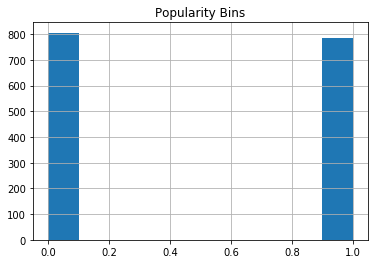

In [34]:
plt.figure()
Y.hist()
plt.title('Popularity Bins')
plt.show()

In [35]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)
print('Training Set: {}'.format(x_train.shape[0]))
print('Test Set: {}'.format(x_test.shape[0]))

Training Set: 1353
Test Set: 239


In [36]:
performsMLModelComparison(x_train, x_test, y_train, y_test)

C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Used the following models:
['Logistic Regression', 'Support Vector Machine', 'Perceptron', 'KN Neighbors', 'Gradient Boosting', 'Random Forest']
Test Scores
[0.5062761506276151, 0.5062761506276151, 0.49372384937238495, 0.5104602510460251, 0.5899581589958159, 0.5774058577405857]
AUC Scores
[0.5, 0.5, 0.5, 0.5113811458187422, 0.5899985992435915, 0.5770766213755427]
Average test accuracies of all models is: 0.5306834030683404
Gradient Boosting is the best model
Test Accuracy: 0.5899581589958159
AUC Score: 0.5899985992435915
Confusion Matrix
    0   1
0  71  50
1  48  70


C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=140, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

### Approach 2: with Gap

In [37]:
# Define In- and Output
X = df_features
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))

Size of Input: (1592, 120)
Size of Output: (1592,)


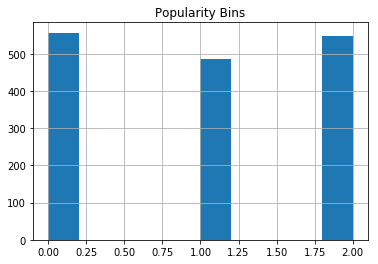

In [38]:
# Create quantile bins for popularity
gapSize = 0.3
binSize = (1-gapSize)/2
Y = pd.qcut(Y, [0, binSize, binSize+gapSize, 1], labels= False)
Y.head()
plt.figure()
Y.hist()
plt.title('Popularity Bins')
plt.show()

In [39]:
# Throw away the middle one
df_curr = pd.concat([X, Y], axis = 1)
n = df_curr.shape[0]
df_curr = df_curr[df_curr.popularity!=1]
print('Reduced data set to {} from {}:'.format(df_curr.shape[0], n))
df_curr.popularity = df_curr.popularity.replace(2,1)

Reduced data set to 1106 from 1592:


In [40]:
# Build input/output:
X = df_curr.iloc[:, :-1]
X_norm = normalize(X)
Y = df_curr.popularity
print('Size of Input: {}'.format(X_norm.shape))
print('Size of Output: {}'.format(Y.shape))

Size of Input: (1106, 120)
Size of Output: (1106,)


In [41]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)
print('Training Set: {}'.format(x_train.shape[0]))
print('Test Set: {}'.format(x_test.shape[0]))

Training Set: 940
Test Set: 166


In [42]:
# Trains different models and compare results
model = performsMLModelComparison(x_train, x_test, y_train, y_test)

C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Used the following models:
['Logistic Regression', 'Support Vector Machine', 'Perceptron', 'KN Neighbors', 'Gradient Boosting', 'Random Forest']
Test Scores
[0.5180722891566265, 0.5180722891566265, 0.5180722891566265, 0.5301204819277109, 0.608433734939759, 0.6024096385542169]
AUC Scores
[0.5, 0.5, 0.5, 0.5334302325581396, 0.608139534883721, 0.6045058139534885]
Average test accuracies of all models is: 0.5491967871485944
Gradient Boosting is the best model
Test Accuracy: 0.608433734939759
AUC Score: 0.608139534883721
Confusion Matrix
    0   1
0  53  33
1  32  48


C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


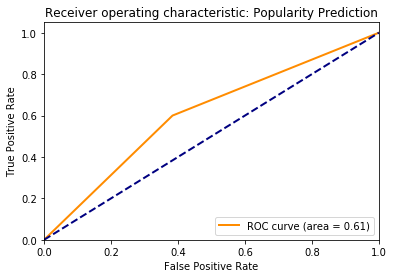

In [43]:
plotROCCurve(y_test, model.predict(x_test), 'Popularity Prediction')

In [44]:
# Analyse feature importance
list_features = featureImportance(x_train, y_train, list(df_features.columns))
dict_features = dict(list_features)

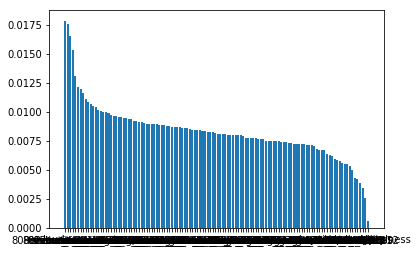

In [45]:
# Plot bar plot of feature importance
plt.figure()
plt.bar(range(len(dict_features)), dict_features.values(), align='center')
plt.xticks(range(len(dict_features)), dict_features.keys())
plt.show()

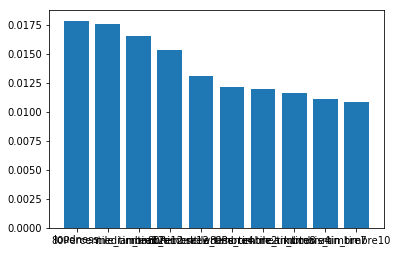

Top 10 Features: 
[('loudness', 0.01786902630361211), ('80Percentile_timbre12', 0.01760271801219514), ('median_timbre12', 0.016583438399828395), ('mean_timbre12', 0.015389716219674653), ('80Percentile_timbre4', 0.01313153205058648), ('skewness_timbre2', 0.012189930767476579), ('80Percentile_timbre8', 0.011957885326952833), ('mean_timbre4', 0.011617575335665611), ('kurtosis_timbre7', 0.011146743936069552), ('min_timbre10', 0.01084267661855836)]


In [46]:
dict_topFeatures = dict(list_features[:10])
plt.figure()
plt.bar(range(len(dict_topFeatures)), dict_topFeatures.values(), align='center')
plt.xticks(range(len(dict_topFeatures)), dict_topFeatures.keys())
plt.show()
print('Top 10 Features: ')
print(list_features[:10])

### Approach 3: Group by Genres

In [47]:
df_songs = pd.read_csv('subset_every_feature.csv')
df_genre = df_songs['genre']
df_genre.head()

0                latin
1            dance pop
2    alternative metal
3                latin
4                  pop
Name: genre, dtype: object

In [48]:
df_genre.value_counts()

dance pop                291
None                     140
pop                      109
latin                     69
alternative metal         37
hip hop                   37
big room                  32
adult standards           31
reggaeton                 28
german hip hop            24
indie r&b                 24
detroit hip hop           23
canadian hip hop          23
french hip hop            22
edm                       22
canadian pop              22
deep dutch hip hop        20
album rock                19
mandopop                  18
finnish dance pop         16
permanent wave            15
modern rock               15
neo mellow                13
deep german hip hop       12
c-pop                     12
danish hip hop            12
deep tropical house       11
francoton                 11
tropical house            11
downtempo                 11
                        ... 
indie quebecois            1
electro                    1
afrobeats                  1
neo-singer-son

In [49]:
df_curr = pd.concat([df, df_genre], axis = 1)
df_curr = pd.concat([df_curr[df_curr.genre == 'dance pop'], df_curr[df_curr.genre == 'pop']])
print(df_curr.shape)

(400, 177)


In [50]:
# Define In- and Output
X = df_curr[features]
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_curr['popularity']
print('Size of Output: {}'.format(Y.shape))

Size of Input: (400, 120)
Size of Output: (400,)


In [51]:
# Create quantile bins for popularity
Y = pd.qcut(Y, 2, labels= False)
Y.head()

1     1
8     0
10    1
15    1
25    1
Name: popularity, dtype: int64

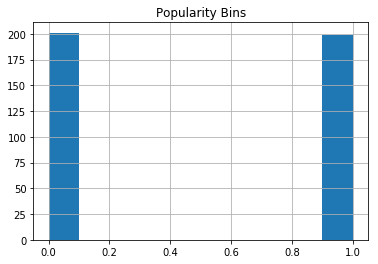

In [52]:
plt.figure()
Y.hist()
plt.title('Popularity Bins')
plt.show()

In [53]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)
print('Training Set: {}'.format(x_train.shape[0]))
print('Test Set: {}'.format(x_test.shape[0]))

Training Set: 340
Test Set: 60


In [54]:
model = performsMLModelComparison(x_train, x_test, y_train, y_test)

C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Used the following models:
['Logistic Regression', 'Support Vector Machine', 'Perceptron', 'KN Neighbors', 'Gradient Boosting', 'Random Forest']
Test Scores
[0.45, 0.4666666666666667, 0.48333333333333334, 0.3333333333333333, 0.48333333333333334, 0.5]
AUC Scores
[0.44660734149054504, 0.46273637374860954, 0.5, 0.3292547274749722, 0.47997775305895435, 0.4994438264738599]
Average test accuracies of all models is: 0.4527777777777778
Random Forest is the best model
Test Accuracy: 0.5
AUC Score: 0.4994438264738599
Confusion Matrix
    0   1
0  16  15
1  15  14


### Approach 4: Feature Reducing

In [55]:
# Define In- and Output
X = df_features
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))
# Create quantile bins for popularity
gapSize = 0.3
binSize = (1-gapSize)/2
Y = pd.qcut(Y, [0, binSize, binSize+gapSize, 1], labels= False)
# Throw away the middle one
df_curr = pd.concat([X, Y], axis = 1)
n = df_curr.shape[0]
df_curr = df_curr[df_curr.popularity!=1]
print('Reduced data set to {} from {}:'.format(df_curr.shape[0], n))
df_curr.popularity = df_curr.popularity.replace(2,1)

Size of Input: (1592, 120)
Size of Output: (1592,)
Reduced data set to 1106 from 1592:


In [56]:
# Get list of features
rankedFeatures = list(dict_features.keys())

In [57]:
n = len(rankedFeatures)
testAcc = list()
model = RandomForestClassifier(n_estimators=140)
vec = np.arange(5,n,2)
for i in vec:
    X = df_curr[rankedFeatures[:i+1]]
    X_norm = normalize(X)
    Y = df_curr.popularity
    print('Size of Input: {}'.format(X_norm.shape))
    print('Size of Output: {}'.format(Y.shape))
    x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)
    
    model = runsModel(x_train, x_test, y_train, y_test, model, printing = False)
    testAcc.append(model.score(x_test, y_test))
    

Size of Input: (1106, 6)
Size of Output: (1106,)
Size of Input: (1106, 8)
Size of Output: (1106,)
Size of Input: (1106, 10)
Size of Output: (1106,)
Size of Input: (1106, 12)
Size of Output: (1106,)
Size of Input: (1106, 14)
Size of Output: (1106,)
Size of Input: (1106, 16)
Size of Output: (1106,)
Size of Input: (1106, 18)
Size of Output: (1106,)
Size of Input: (1106, 20)
Size of Output: (1106,)
Size of Input: (1106, 22)
Size of Output: (1106,)
Size of Input: (1106, 24)
Size of Output: (1106,)
Size of Input: (1106, 26)
Size of Output: (1106,)
Size of Input: (1106, 28)
Size of Output: (1106,)
Size of Input: (1106, 30)
Size of Output: (1106,)
Size of Input: (1106, 32)
Size of Output: (1106,)
Size of Input: (1106, 34)
Size of Output: (1106,)
Size of Input: (1106, 36)
Size of Output: (1106,)
Size of Input: (1106, 38)
Size of Output: (1106,)
Size of Input: (1106, 40)
Size of Output: (1106,)
Size of Input: (1106, 42)
Size of Output: (1106,)
Size of Input: (1106, 44)
Size of Output: (1106,)
Si

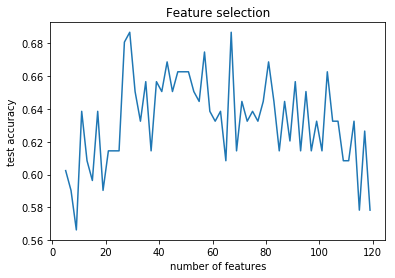

Max. test accuracy of 0.6867469879518072 at 30 features


In [58]:
plt.figure()
plt.plot(vec, testAcc)
plt.xlabel('number of features')
plt.ylabel('test accuracy')
plt.title('Feature selection')
plt.show()
maxTestAcc = max(testAcc)
optFeatures = vec[(testAcc.index(maxTestAcc))]+1

print('Max. test accuracy of {} at {} features'.format(maxTestAcc, optFeatures))


### Tune Hyperparameters

In [59]:
n_features = 60
gapSize = 0.3

In [60]:
# Define In- and Output
X = df_features[rankedFeatures[:n_features]]
print('Size of Input: {}'.format(X.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))

# Create quantile bins for popularity
binSize = (1-gapSize)/2
Y = pd.qcut(Y, [0, binSize, binSize+gapSize, 1], labels= False)
# Throw away the middle one
df_curr = pd.concat([X, Y], axis = 1)
n = df_curr.shape[0]
df_curr = df_curr[df_curr.popularity!=1]
print('Reduced data set to {} from {}:'.format(df_curr.shape[0], n))
df_curr.popularity = df_curr.popularity.replace(2,1)

X = df_curr.iloc[:,:-1]
print(X.shape)
X_norm = normalize(X)
Y = df_curr.popularity
print(Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)

Size of Input: (1592, 60)
Size of Output: (1592,)
Reduced data set to 1106 from 1592:
(1106, 60)
(1106,)


In [61]:
model = RandomForestClassifier(n_estimators=140)
model = runsModel(x_train, x_test, y_train, y_test, model)

Test Accuracy: 0.6385542168674698
Training Accuracy: 0.9968085106382979
AUC Score: 0.6363372093023255
Confusion Matrix
    0   1
0  60  26
1  34  46


In [62]:
# Tune Hyperparameter
n_estimators = np.arange(40, 300, 5)
testAcc = list()
for i in n_estimators:
    model = RandomForestClassifier(n_estimators=i)
    model = runsModel(x_train, x_test, y_train, y_test, model, printing=False)
    testAcc.append(model.score(x_test, y_test))
    if(i%50==0):
        print('Still going...')


Still going...
Still going...
Still going...
Still going...
Still going...


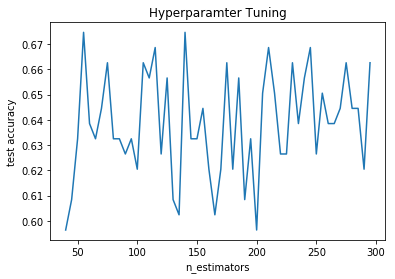

Max. test accuracy of 0.6746987951807228 at n_estimtors = 55


In [63]:
plt.figure()
plt.plot(n_estimators, testAcc)
plt.xlabel('n_estimators')
plt.ylabel('test accuracy')
plt.title('Hyperparamter Tuning')
plt.show()
maxTestAcc = max(testAcc)
optEstimators = n_estimators[(testAcc.index(maxTestAcc))]

print('Max. test accuracy of {} at n_estimtors = {}'.format(maxTestAcc, optEstimators))

### Best run for popularity

In [77]:
# Define In- and Output
X = df_features[rankedFeatures[:n_features]]
print('Size of Input: {}'.format(X.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))

# Create quantile bins for popularity
binSize = (1-gapSize)/2
Y = pd.qcut(Y, [0, binSize, binSize+gapSize, 1], labels= False)
# Throw away the middle one
df_curr = pd.concat([X, Y], axis = 1)
n = df_curr.shape[0]
df_curr = df_curr[df_curr.popularity!=1]
print('Reduced data set to {} from {}:'.format(df_curr.shape[0], n))
df_curr.popularity = df_curr.popularity.replace(2,1)

X = df_curr.iloc[:,:-1]
print(X.shape)
X_norm = normalize(X)
Y = df_curr.popularity
print(Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)

Size of Input: (1592, 60)
Size of Output: (1592,)
Reduced data set to 1106 from 1592:
(1106, 60)
(1106,)


In [82]:
model = RandomForestClassifier(n_estimators=100)
model = runsModel(x_train, x_test, y_train, y_test, model)

Test Accuracy: 0.6445783132530121
Training Accuracy: 0.9968085106382979
AUC Score: 0.6438953488372093
Confusion Matrix
    0   1
0  57  29
1  30  50


## Predict regional charts

In [83]:
# Define In- and Output
X = df_features
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_output
Y = Y.drop('popularity', axis = 1)
print('Size of Output: {}'.format(Y.shape))

Size of Input: (1592, 120)
Size of Output: (1592, 53)


In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
testAccuracy = list()
aucScore = list()
for i in range(Y.shape[1]):
    print('Performs prediction at Country: {}'.format(Y.columns[i]))
    Y_curr = Y.iloc[:,i]
    x_train, x_test, y_train, y_test = train_test_split(X_norm,Y_curr, test_size=0.15, random_state=100)
    bestModel = performsMLModelComparison(x_train, x_test, y_train, y_test, verbose = False)
    testAccuracy.append(bestModel.score(x_test, y_test))
    fpr, tpr, thresholds = roc_curve(y_test, bestModel.predict(x_test))
    aucScore.append(auc(fpr, tpr))

Performs prediction at Country: ee
Random Forest is the best model
Test Accuracy: 0.7949790794979079
AUC Score: 0.6111111111111112
Confusion Matrix
     0   1
0  176   0
1   49  14
Performs prediction at Country: br
Random Forest is the best model
Test Accuracy: 0.803347280334728
AUC Score: 0.6262073993074541
Confusion Matrix
     0   1
0  176   1
1   46  16
Performs prediction at Country: my
Random Forest is the best model
Test Accuracy: 0.7405857740585774
AUC Score: 0.702360453436648
Confusion Matrix
     0   1
0  131   7
1   55  46
Performs prediction at Country: cz
Random Forest is the best model
Test Accuracy: 0.698744769874477
AUC Score: 0.6970142977291842
Confusion Matrix
    0   1
0  93  30
1  42  74
Performs prediction at Country: pe
Random Forest is the best model
Test Accuracy: 0.8326359832635983
AUC Score: 0.6491228070175439
Confusion Matrix
     0   1
0  182   0
1   40  17
Performs prediction at Country: gb
Random Forest is the best model
Test Accuracy: 0.6694560669456067


Random Forest is the best model
Test Accuracy: 0.7531380753138075
AUC Score: 0.595890410958904
Confusion Matrix
     0   1
0  166   0
1   59  14
Performs prediction at Country: gr
Gradient Boosting is the best model
Test Accuracy: 0.7238493723849372
AUC Score: 0.6425883256528419
Confusion Matrix
     0   1
0  142  13
1   53  31
Performs prediction at Country: pa
Random Forest is the best model
Test Accuracy: 0.8326359832635983
AUC Score: 0.6610169491525424
Confusion Matrix
     0   1
0  180   0
1   40  19
Performs prediction at Country: uy
Random Forest is the best model
Test Accuracy: 0.8242677824267782
AUC Score: 0.6610800744878957
Confusion Matrix
     0   1
0  177   2
1   40  20
Performs prediction at Country: au
Gradient Boosting is the best model
Test Accuracy: 0.6610878661087866
AUC Score: 0.6348646723646724
Confusion Matrix
     0   1
0  113  22
1   59  45
Performs prediction at Country: pt
Gradient Boosting is the best model
Test Accuracy: 0.6569037656903766
AUC Score: 0.65294

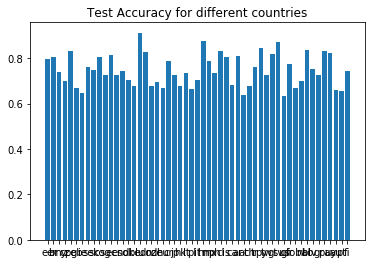

Average test accuracy: 0.6385542168674699
Best test accuracy: 0.6746987951807228
Worst test accuracy: 0.5963855421686747


In [87]:
countryNames = list(Y.columns)
plt.figure()
plt.bar(range(len(countryNames)), testAccuracy, align='center')
plt.xticks(range(len(countryNames)), countryNames)
plt.title('Test Accuracy for different countries')
plt.show()
print('Average test accuracy: {}'.format(np.mean(testAcc)))
print('Best test accuracy: {}'.format(np.max(testAcc)))
print('Worst test accuracy: {}'.format(np.min(testAcc)))

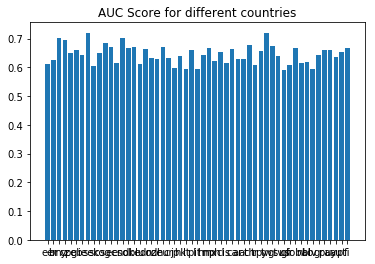

Average auc Score: 0.6456765755545727
Best auc Score: 0.7206712206712207
Worst auc Score: 0.5911693144411049


In [89]:
countryNames = list(Y.columns)
plt.figure()
plt.bar(range(len(countryNames)), aucScore, align='center')
plt.xticks(range(len(countryNames)), countryNames)
plt.title('AUC Score for different countries')
plt.show()
print('Average auc Score: {}'.format(np.mean(aucScore)))
print('Best auc Score: {}'.format(np.max(aucScore)))
print('Worst auc Score: {}'.format(np.min(aucScore)))

## Try DNN on dataset

In [67]:
X = df_timbre.iloc[:, :12]
X.head()

timbre_all_1  \
0  [0.0, 24.1, 23.897, 27.356, 32.848, 33.768, 36...   
1  [0.0, 20.612, 29.468, 37.065, 42.457, 50.682, ...   
2  [0.0, 31.777, 39.716, 39.18, 35.536, 35.466, 3...   
3  [29.786, 44.835, 43.066, 30.901, 26.588, 17.29...   
4  [16.954, 21.548, 23.284, 25.593, 27.256, 28.65...   

                                        timbre_all_2  \
0  [171.13, -232.911, -237.644, -157.177, -88.399...   
1  [171.13, 281.408, 154.885, 7.066, -17.206, 134...   
2  [171.13, 39.599, 2.798, -27.888, -6.495, 24.74...   
3  [123.603, 145.221, 165.632, 155.171, 55.16, 54...   
4  [-106.498, -157.065, -152.822, -170.706, -169....   

                                        timbre_all_3  \
0  [9.469, -154.046, -145.614, -107.148, -89.892,...   
1  [9.469, 112.323, 9.7, 65.887, 41.122, 85.356, ...   
2  [9.469, 63.151, 48.759, 31.726, 60.184, 62.982...   
3  [97.607, 61.397, 44.145, 107.329, 99.803, 7.17...   
4  [47.989, -5.792, 33.818, 56.002, 82.42, 83.832...   

                                        timbre_all_4  \
0  [-28.48, -63.445, -84.944, -133.198, -69.415, ...   
1  [-28.48, -106.592, 74.184, 57.284, -187.479, -...   
2  [-28.48, -88.716, 0.539, 34.455, -22.788, 9.36...   
3  [-310.517, 59.632, 90.762, 50.261, 54.535, 145...   
4  [-56.878, -16.571, -28.488, -11.643, -16.119, ...   

                                        timbre_all_5  \
0  [57.491, 6.579, 15.005, -19.511, -25.059, -18....   
1  [57.491, 32.225, 19.191, 117.453, 49.711, 85.6...   
2  [57.491, 52.622, 50.193, 20.511, 28.765, 36.98...   
3  [87.878, 47.105, 78.731, 145.399, 129.718, 106...   
4  [135.306, 87.387, 88.055, 104.627, 100.962, 10...   

                                        timbre_all_6  \
0  [-50.067, -73.619, -60.84, -47.25, -49.875, -4...   
1  [-50.067, 59.13, 41.981, 134.899, -17.262, -12...   
2  [-50.067, 92.913, -0.076, -37.353, -11.487, -3...   
3  [227.047, -39.664, -65.7, -21.95, -18.758, -9....   
4  [-23.107, -51.62, -37.607, -34.948, -42.218, -...   

                                        timbre_all_7  \
0  [14.833, 15.024, 24.499, -6.516, -8.199, -0.71...   
1  [14.833, -14.27, -23.128, 7.356, -26.231, -40....   
2  [14.833, 9.734, 6.371, 1.575, 24.376, 29.255, ...   
3  [68.419, 39.715, 26.9, -7.679, -24.475, -41.45...   
4  [50.826, 16.039, 26.418, 5.967, 20.658, 9.299,...   

                                        timbre_all_8  \
0  [5.359, 4.801, 18.949, 21.249, -0.277, -0.328,...   
1  [5.359, -5.607, -56.754, -3.356, 47.938, -19.8...   
2  [5.359, 9.137, -7.323, 27.296, -0.841, 43.187,...   
3  [10.427, 10.712, 66.095, -13.804, -8.591, 43.1...   
4  [-10.056, 19.528, 15.119, -1.994, 2.54, 17.328...   

                                        timbre_all_9  \
0  [-27.228, -7.805, -8.304, 40.258, 33.085, 33.6...   
1  [-27.228, -10.957, -15.955, 30.643, -7.379, -0...   
2  [-27.228, 10.681, 3.93, 15.943, 13.14, 5.89, -...   
3  [-29.121, -18.868, -0.496, -8.432, 0.868, -4.9...   
4  [-10.385, 8.696, 12.326, 11.872, 13.119, 16.88...   

                                       timbre_all_10  \
0  [0.973, 2.661, -1.462, 14.984, 18.834, 23.424,...   
1  [0.973, 22.207, 15.478, 23.2, -2.171, -21.529,...   
2  [0.973, -27.245, 10.954, 2.236, -1.93, -2.151,...   
3  [55.849, -11.17, -22.492, 15.199, 15.004, -21....   
4  [33.954, 6.811, 20.58, 11.461, 7.841, 24.766, ...   

                                       timbre_all_11  \
0  [-10.64, -9.55, -0.761, 12.993, -7.358, -8.305...   
1  [-10.64, 41.326, -93.342, 11.952, 41.559, 5.65...   
2  [-10.64, -9.127, -21.592, 2.371, -23.49, -20.9...   
3  [-15.943, -6.505, -14.11, -18.788, -11.257, -4...   
4  [8.548, -11.543, 5.437, -6.115, -7.659, -2.381...   

                                       timbre_all_12  
0  [-7.228, -17.296, -22.295, -10.881, -15.234, -...  
1  [-7.228, -12.727, 15.358, -21.875, -2.807, 4.9...  
2  [-7.228, 10.088, 11.139, -6.284, 5.677, 3.988,...  
3  [7.366, 54.847, 39.465, 44.759, 42.342, 22.446...  
4  [-45.017, -24.615, -27.227, -23.219, -28.364, ...

In [68]:
def f_append(row):
    timbreList = list()
    for i in range(row.shape[0]):
        timbreList.append(row[i])
    return timbreList

In [69]:
X['timbreAll'] = X['timbre_all_1']
for j in range(X.shape[0]):
    X['timbreAll'] [j] = X['timbreAll'][j][:]
    for i in range(X.shape[1]):
        X['timbreAll'] [j].append(X.iloc[j, i])
    if (j%50 ==0):
        print('Finished {} rows'.format(j))

Finished 0 rows
Finished 50 rows
Finished 100 rows
Finished 150 rows
Finished 200 rows
Finished 250 rows
Finished 300 rows
Finished 350 rows
Finished 400 rows
Finished 450 rows
Finished 500 rows
Finished 550 rows
Finished 600 rows
Finished 650 rows
Finished 700 rows
Finished 750 rows
Finished 800 rows
Finished 850 rows
Finished 900 rows
Finished 950 rows
Finished 1000 rows
Finished 1050 rows
Finished 1100 rows
Finished 1150 rows
Finished 1200 rows
Finished 1250 rows
Finished 1300 rows
Finished 1350 rows
Finished 1400 rows
Finished 1450 rows
Finished 1500 rows
Finished 1550 rows


In [70]:
print('Length of Timbre Vector: ')
print(len(X['timbreAll'][0]))

Length of Timbre Vector: 
1081


In [71]:
X = X['timbreAll']
Y = df_output
Y = Y.drop('popularity', axis = 1)

In [72]:
print(X.shape)
print(Y.shape)

(1592,)
(1592, 53)


In [75]:
len(X[1])

902